In [26]:
import utils, pc_algorithm, random, copy, statistics
import pandas as pd
import numpy as np
import networkx as nx
from itertools import product
from pgmpy.estimators import BicScore

In [27]:
data = utils.get_data_from_ucirepo(109)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

In [ ]:
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 178 entries, 0 to 177
# Data columns (total 15 columns):
#  #   Column                        Non-Null Count  Dtype  
# ---  ------                        --------------  -----  
#  0   Alcohol                       178 non-null    float64
#  1   Malicacid                     178 non-null    float64
#  2   Ash                           178 non-null    float64
#  3   Alcalinity_of_ash             178 non-null    float64
#  4   Magnesium                     178 non-null    int64  
#  5   Total_phenols                 178 non-null    float64
#  6   Flavanoids                    178 non-null    float64
#  7   Nonflavanoid_phenols          178 non-null    float64
#  8   Proanthocyanins               178 non-null    float64
#  9   Color_intensity               178 non-null    float64
#  10  Hue                           178 non-null    float64
#  11  0D280_0D315_of_diluted_wines  178 non-null    float64
#  12  Proline                       178 non-null    int64  
#  13  class_2                       178 non-null    int64  
#  14  class_3                       178 non-null    int64  
# dtypes: float64(11), int64(4)
# memory usage: 21.0 KB

In [28]:
labels = data.columns.tolist()
data = np.array(data)

In [29]:
graph, sepetated_set = pc_algorithm.pc_get_graph(data)
cpdag_graph = pc_algorithm.pc_apply_rules(graph, sepetated_set)

In [30]:
network_graph = nx.DiGraph(cpdag_graph)
pos = nx.kamada_kawai_layout(network_graph)

In [31]:
print("Is Directed?: " + str(nx.is_directed(network_graph)))
print("Is DAG?: " + str(nx.is_directed_acyclic_graph(network_graph)))

Is Directed?: True
Is DAG?: False


In [32]:
undirected_edges = {frozenset(i) for i in network_graph.edges() if network_graph.has_edge(*i[::-1])}
edge_colors = ["red" if frozenset(edge) in undirected_edges else "gray" for edge in network_graph.edges()]

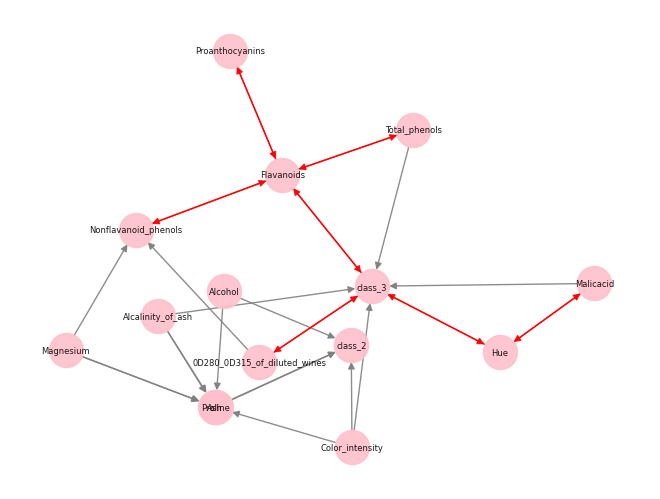

In [33]:
nx.draw(network_graph, pos,
        edge_color = edge_colors,
        width=1,
        linewidths = 1,
        node_size = 600,
        font_size = 6,
        node_color="pink",
        alpha=0.9,
        labels=dict(zip(range(len(labels)), labels)))

In [34]:
possible_edges = list(product([0, 1], repeat = len(undirected_edges)))
print("All posiible graphs: " + str(len(possible_edges)))

All posiible graphs: 128


In [35]:
dags = []

for i in possible_edges:
    
    network = nx.DiGraph(cpdag_graph)
    
    for j, k in enumerate(i):
        
        l = [*list(undirected_edges)[j]][0]
        m = [*list(undirected_edges)[j]][1]
        
        network.remove_edge(l, m)
        network.remove_edge(m , l)
        
        if k == 0:
            network.add_edge(l, m)
        else:
            network.add_edge(m , l)
    
    if nx.is_directed_acyclic_graph(network):
        
        dags.append(network)

In [36]:
len(dags)

60

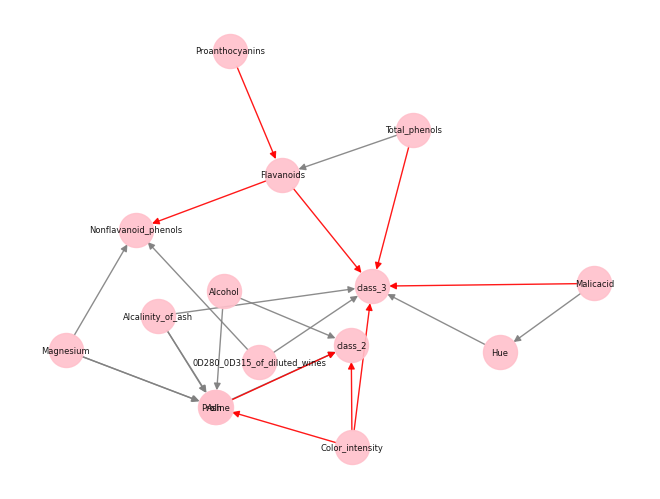

In [37]:
nx.draw(dags[0], pos,
        edge_color = edge_colors,
        width=1,
        linewidths = 1,
        node_size = 600,
        font_size = 6,
        node_color = "pink",
        alpha=0.9,
        labels=dict(zip(range(len(labels)), labels)))

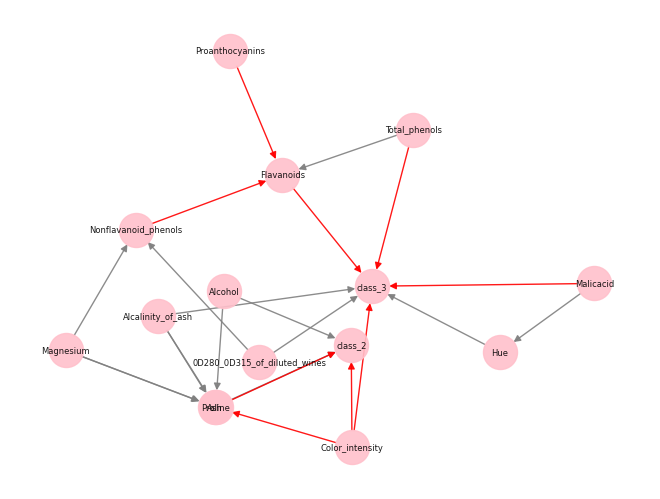

In [41]:
bic_calculator = BicScore(pd.DataFrame(data))
bics = [bic_calculator.score(i) for i in dags]

nx.draw(dags[bics.index(min(bics))], pos,
        edge_color = edge_colors,
        width=1,
        linewidths = 1,
        node_size = 600,
        font_size = 6,
        node_color = "pink",
        alpha=0.9,
        labels=dict(zip(range(len(labels)), labels)))